<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Introduction to Machine Learning - 25732 <br>
<font color=2565AE size=5>
Department of Electrical Enginnering<br>
Dr. Mohammad Hossein Yassaee<br>
Fall 2024<br>

### Information:

1.   Full Name: fariborz kohanzad 
2.   Student Number: 400103613



---

*I. You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*II. It is highly recommended to read each codeline carefully and try to understand what it exactly does.*

*III. Do not copy codes completely from internet sources such as Chat-GPT or etc. If you are using any sources, please put its link in the beging of the block.*

*IV. Question 6 has additional points.*

If you have any question you can contact related TAs:
 - Homeworks coordinator: @danialayati
 - Questions 1, 2, 3 & 6: @armin_dh
 - Question 4 & 5: @Rosebaekfany


 Best of luck and have fun!

---

<font color=3C99D size=5>
Question One: Numpy Applications

##  Part I: Image Processing with NumPy

### Libraries

In [ ]:
# Imports
import cv2
# for google colab
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


In this section, First you should load an image and convert it to a gray scaled image then we'll process it by some operations using numpy.

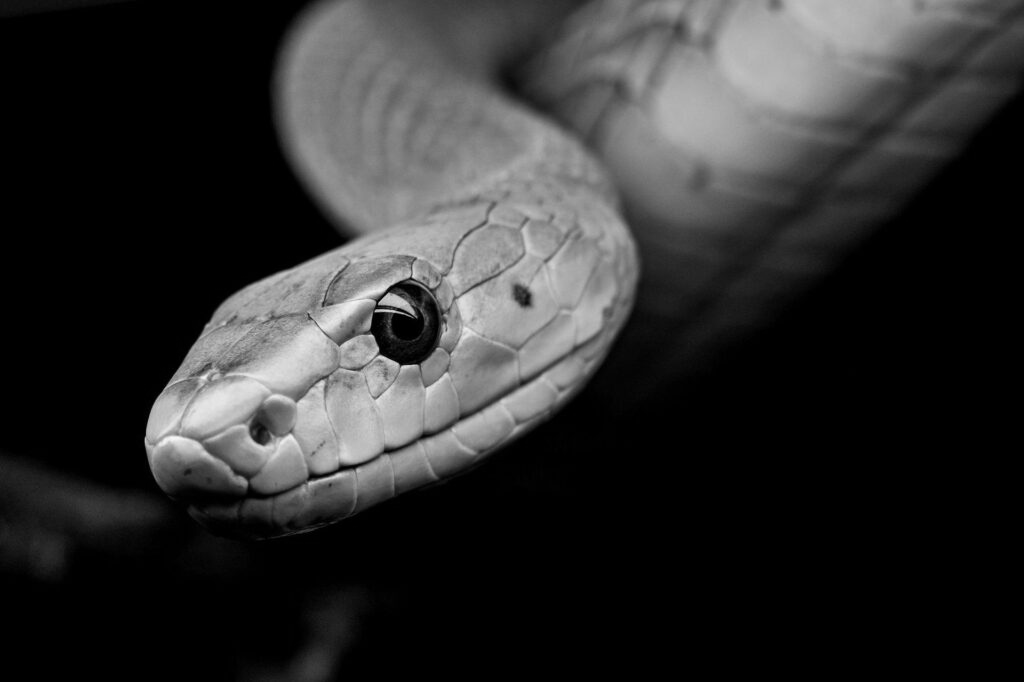

In [ ]:
# read and show the image
image = cv2.imread('snake.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
# another way to load image by pyplot
# image = np.asarray(Image.open('./R.jpeg'))
# plt.imshow(image)

<b> From now on, you must work with the grayscale image in each cell.

In gray scaled 0 means black and 255 is white and each number between these two shows a color in range of black to white. Now for this task, Make pixels brighter than 150, 100 degree darker.

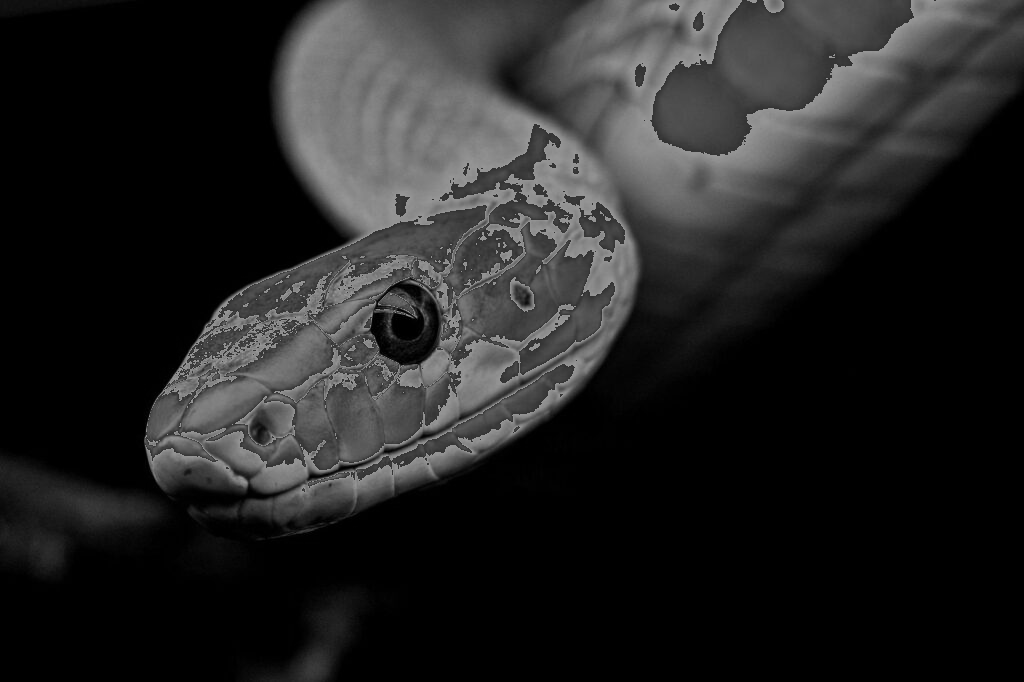

In [ ]:
# TODO: don't use loop or anything like that and try to code by numpy where
darker_image = gray_image.copy()
darker_image[darker_image > 150] -= 100
cv2_imshow(darker_image)

In grayscale images, pixel values typically range from 0 to 255, where 0 represents black and 255 represents white. Subtracting each pixel value from 255 effectively produces the negative of the grayscale image. Now we want to create negative grayscale version of our image.

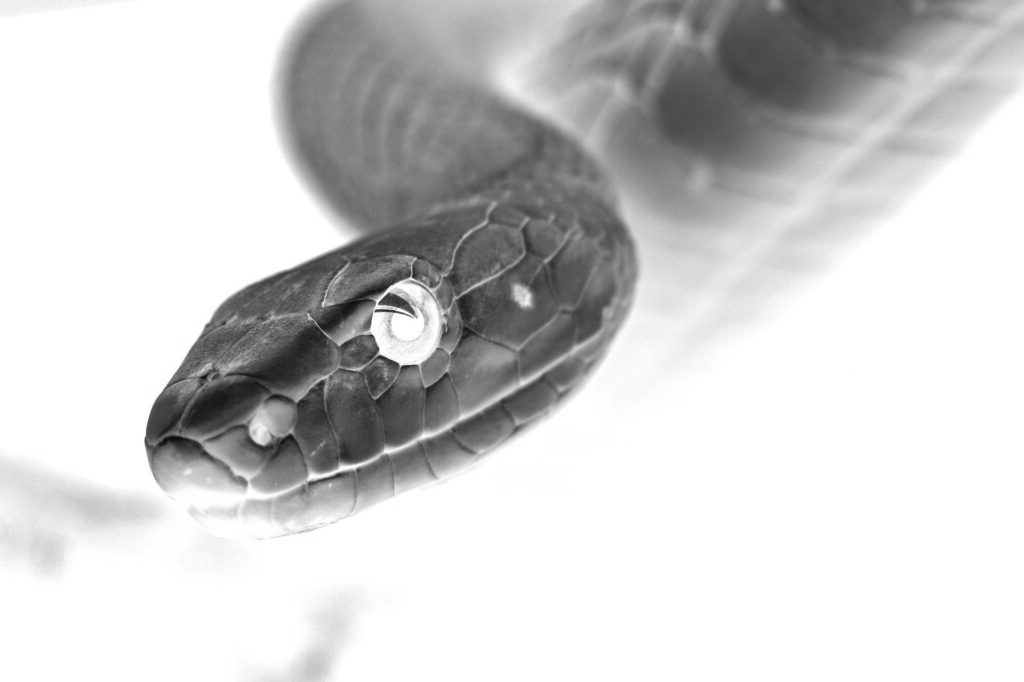

In [ ]:
# TODO: Create negative grayscale image
negative_grayscale_image = 255 - gray_image
cv2_imshow(negative_grayscale_image)

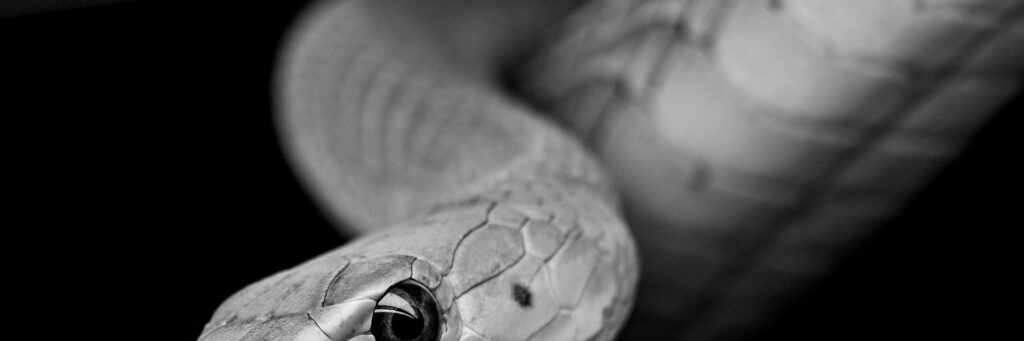

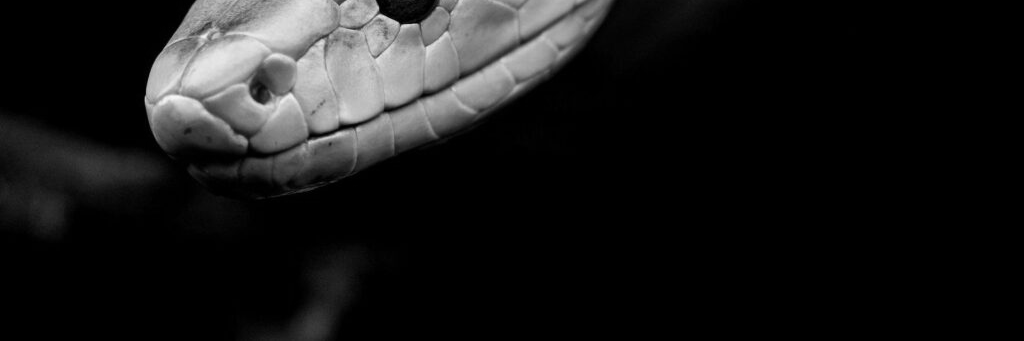

In [ ]:
# TODO: Split the image horizontally into two equal parts using NumPy's split function.
upper_half, lower_half = np.split(gray_image, 2 , axis =0)
cv2_imshow(upper_half)
print(' ')
cv2_imshow(lower_half)

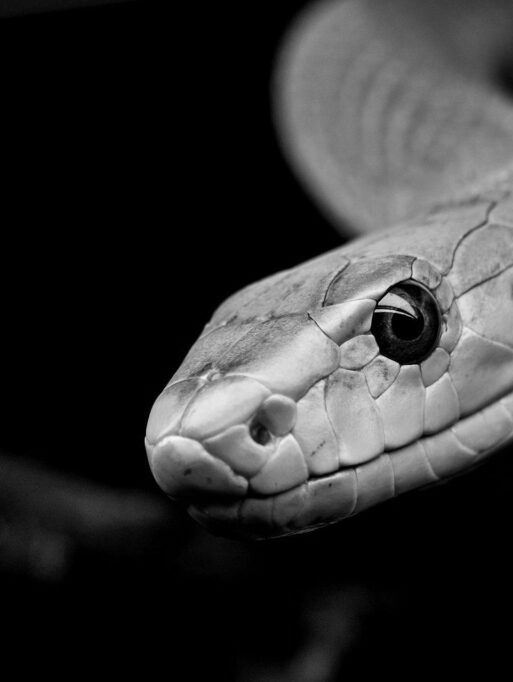

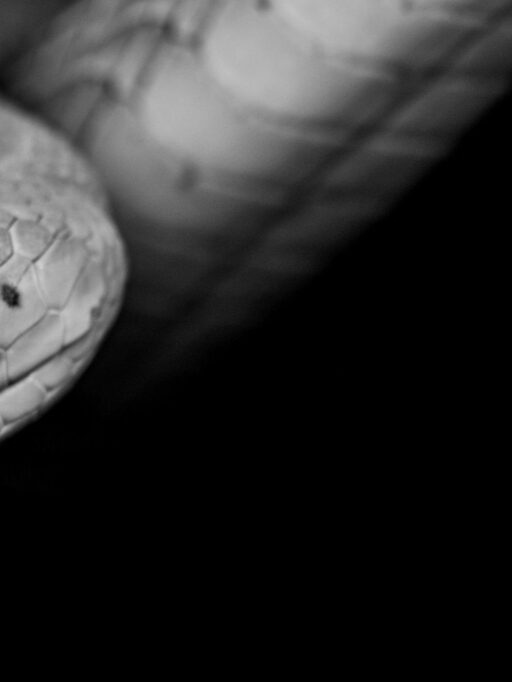

In [ ]:
# TODO: Split the image vertically into two equal parts using indexes and slicing.
left_half, right_half = gray_image[: ,:gray_image.shape[1]//2 + 1 ] , gray_image[: ,  gray_image.shape[1]//2:]
cv2_imshow(left_half)

cv2_imshow(right_half)

Now We need 4 vertical split (vsplit) from image. write the code in a way that can be used for each image (not hard code size).

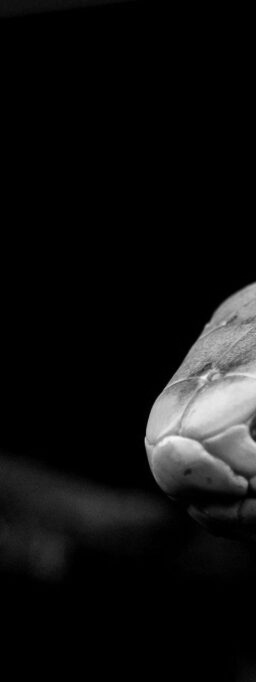

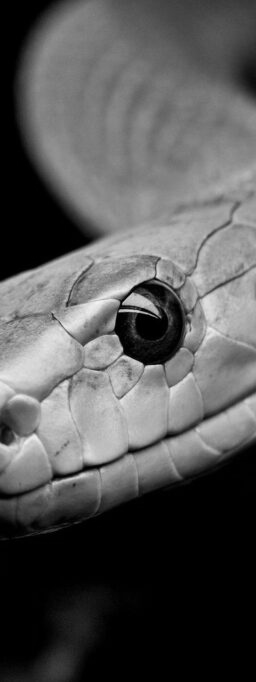

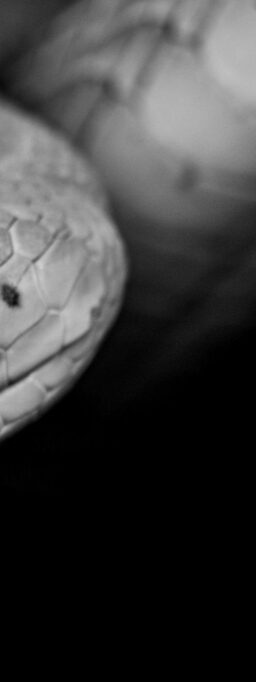

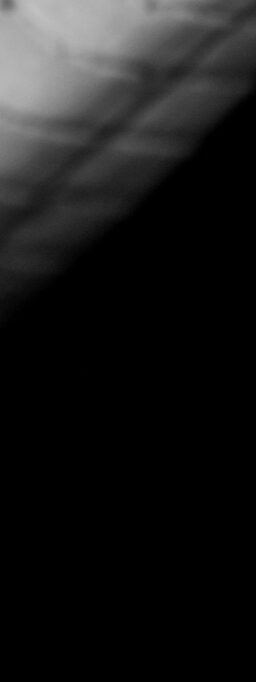

In [ ]:
# TODO: Split the image vertically into four equal parts using numpy vsplit function.
part1, part2, part3, part4 = np.split(gray_image , [gray_image.shape[1]//4 , 2*gray_image.shape[1]//4, 3*gray_image.shape[1]//4] ,axis = 1)
cv2_imshow(part1)
cv2_imshow(part2)
cv2_imshow(part3)
cv2_imshow(part4)

In this section first split the original image horizontally calling them left and right images

In [ ]:
#TODO split image
left,right = gray_image[: ,:gray_image.shape[1]//2 + 1 ] , gray_image[: ,  gray_image.shape[1]//2:]

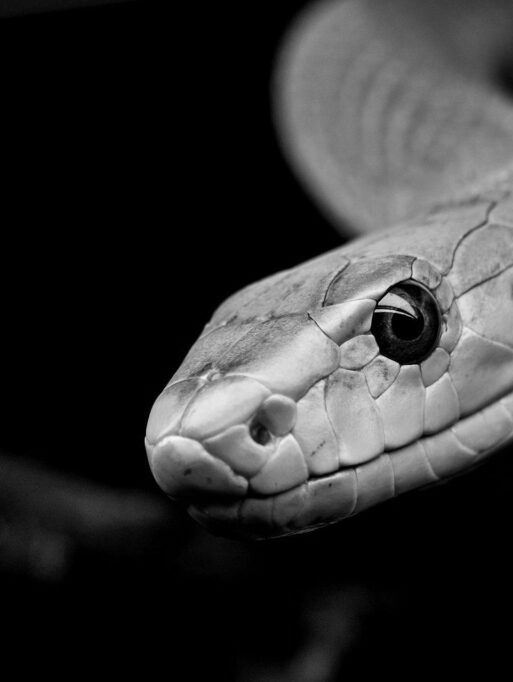

In [ ]:
cv2_imshow(left)

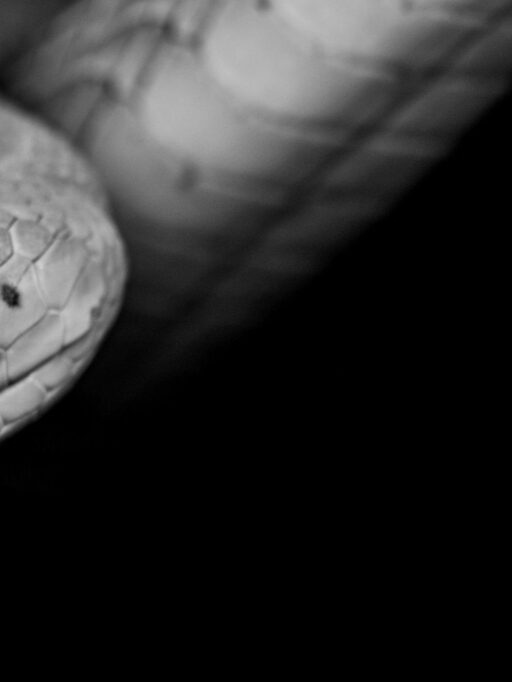

In [ ]:
cv2_imshow(right)

Now, using  invert the left image.

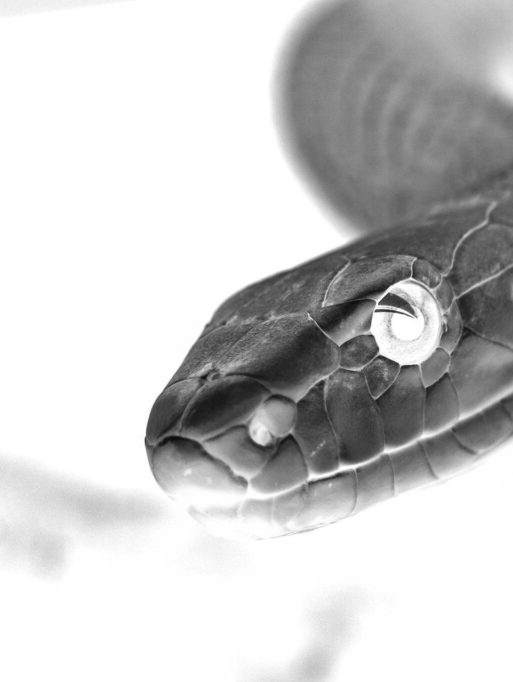

In [ ]:
#TODO: invert left
inverted_left = np.invert(left)

cv2_imshow(inverted_left)

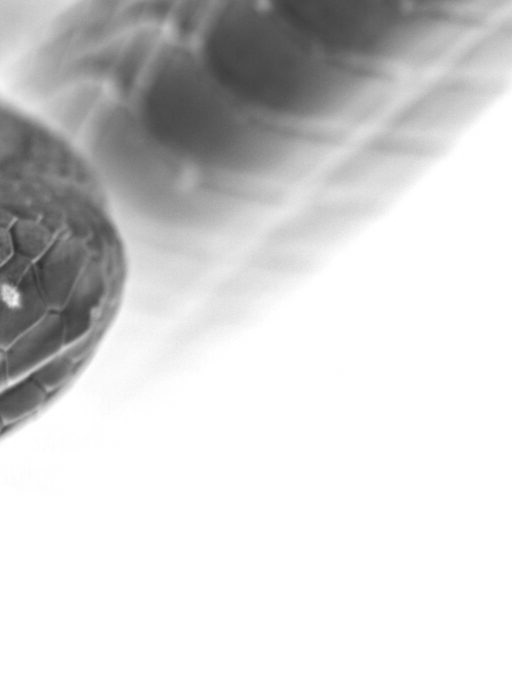

In [ ]:
#iverting right
inverted_right = np.invert(right)

cv2_imshow(inverted_right)

Now, mirror both the inverted left image and the right image.

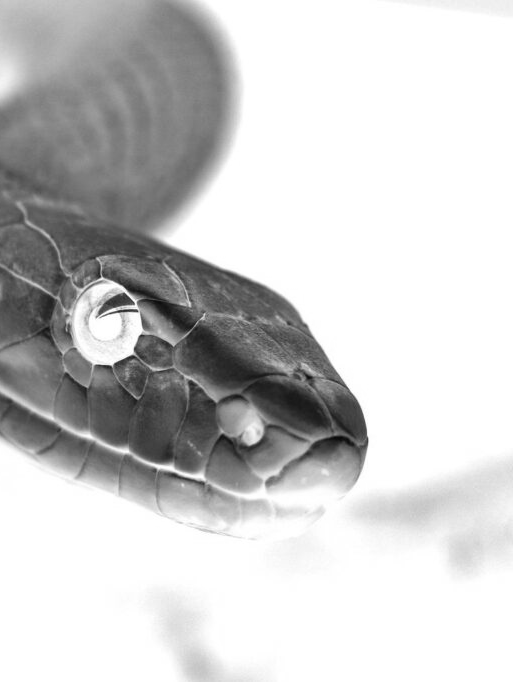

In [ ]:
#TODO: flip inverted left image
mirrored_left = np.flip(inverted_left, axis = 1)

cv2_imshow(mirrored_left)

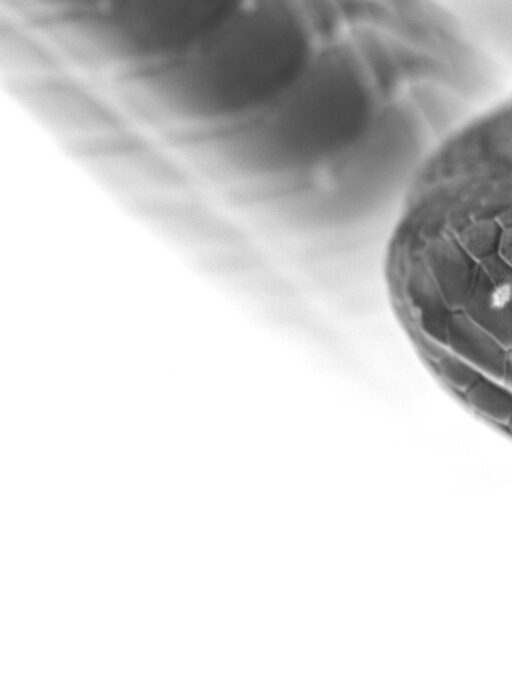

In [ ]:
#TODO: flip right image
mirrored_right = np.flip(inverted_right, axis = 1)

cv2_imshow(mirrored_right)

In the next step we want to concat the two images horizontally.

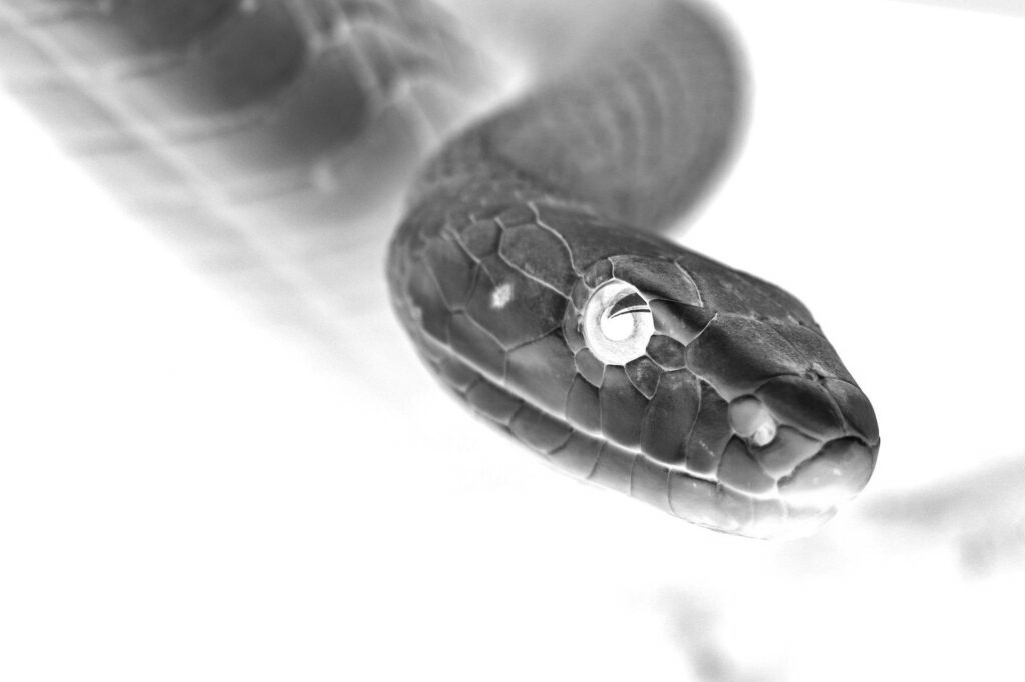

In [ ]:
#TODO: concat mirrored_left and mirrored_right
final_image = np.hstack([mirrored_right , mirrored_left])

cv2_imshow(final_image)

For the final step invert the concated image.

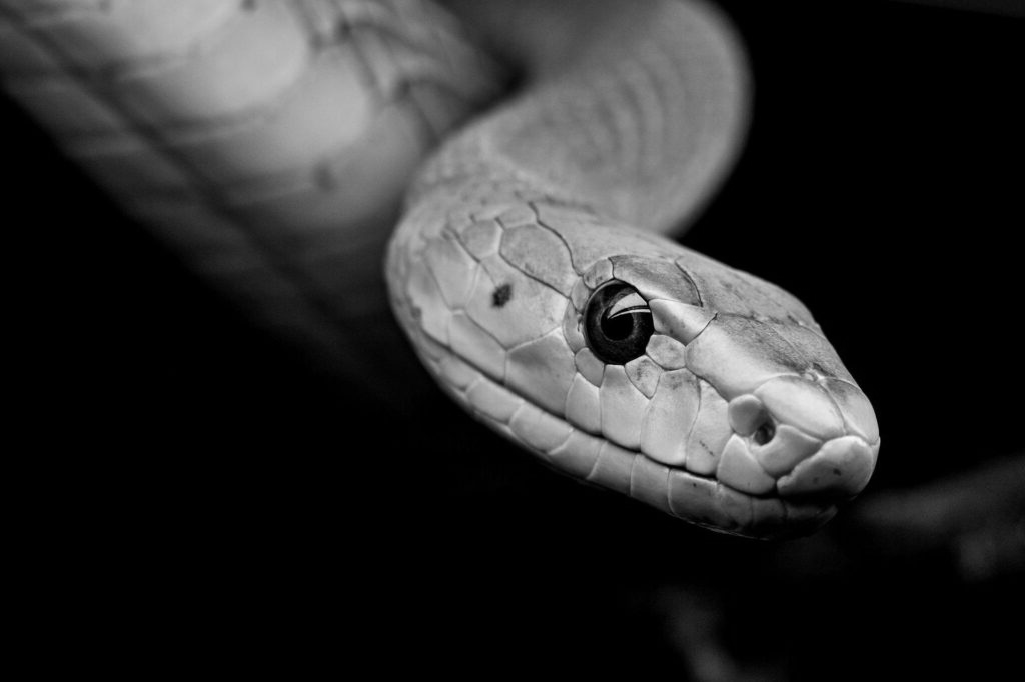

In [ ]:
#TODO: invert final_image
invert_final_image = np.invert(final_image)

cv2_imshow(invert_final_image)

##  Part II: Broadcasting with NumPy

In this question, we have several vectors. From them, we want to find a vector that is most similar to a specific vector.

In order to compare how "similar" two vectors are, we define the D parameter like below (a and b are the two vectors we want to compare, with n indices). the smaller the value of D for 2 vectors is, the more similar those two vectors are.

$D=\sqrt{\Sigma_{i=1}^n(a_i-b_i)^2}$

Inputs: in the first line the users gives the value m, which is the number of vectors. In each of the next m lines, the user will give a vector as the input. In the next line, the users gives the vector v.

You are expected to find the closest vector to v.

In [ ]:
#in this cell, you should only get the inputs


#TODO: get the number m
m = int(input("Enter the number of vectors: "))

#TODO: get m vectors
vectors = []
for i in range(m):
    vector = list(map(float, input(f'Enter the vector components ({i}/{m}): ').split()))
    vectors.append(vector)

#TODO: get the vector v
v = list(map(float, input("Enter the target vector: ").split()))

Enter the number of vectors: 3
Enter the vector components: 1 4 5 2
Enter the vector components: 4 7 8 3
Enter the vector components: 9 8 7 2
Enter the target vector: 1 0 0 3


In [ ]:
#in this cell you should find the expected output. you are not allowed to use loops in this cell.
import math

#TODO: find the difference of all vectors with v
differences = [[(a - b) for a, b in zip(vec, v)] for vec in vectors]

#TODO: compute D for each vector
distances = [math.sqrt(sum(diff ** 2 for diff in difference)) for difference in differences]

#TODO: find the vector with the lowest D
min_index = distances.index(min(distances))
closest_vector = np.array(vectors[min_index])
closest_vector = closest_vector.astype(int)
#TODO: print the most similar vector

print("The closest vector to v is:", closest_vector)

The closest vector to v is: [1 4 5 2]


<font color=3C99D size=5>
Question Two: Introduction to Pandas

In this part you will learn how to work with Pandas library and how to convert raw data into suitable data for model input .

### Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
import matplotlib.ticker as ticker
from math import sqrt
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.3)

In [ ]:
# Change the address as you wish
plays = pd.read_csv('user_artists.dat', sep='\t')
artists = pd.read_csv('artists.dat', sep='\t', usecols=['id','name'])

In [ ]:
plays.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


# Preprocessing

In [ ]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

ap = pd.merge(artists[['id' , 'name']] , plays ,how='left', left_on = 'id' , right_on='artistID')

In [ ]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [ ]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [ ]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [ ]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

#TODO
ap.drop('id' , axis=1 , inplace=True)

In [ ]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table)
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"
###############################################################################


artist_rank  = ap.groupby("name").agg(
    totalUniqueUsers=pd.NamedAgg(column="userID", aggfunc="nunique"),
    totalArtistPlays=pd.NamedAgg(column="playCount", aggfunc="sum")
)

artist_rank = artist_rank.sort_values(by="totalArtistPlays", ascending=False)


artist_rank['avgUserPlays'] = artist_rank["totalArtistPlays"] / artist_rank["totalUniqueUsers"]

In [ ]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [ ]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it
###############################################################################



ap = ap.merge(artist_rank, on="name", how="left")
ap = ap.sort_values(by="playCount", ascending=False)


In [ ]:
ap

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,Thalía,2071,792,324663,26,350035,13462.884615
27302,U2,1094,511,320725,185,493024,2664.994595
8152,Blur,1905,203,257978,114,318221,2791.412281
26670,Paramore,1664,498,227829,399,963449,2414.659148
...,...,...,...,...,...,...,...
38688,Destiny's Child,1810,913,1,83,34746,418.626506
32955,Sia,1290,697,1,56,27597,492.803571
71811,Chris Spheeris,510,4988,1,5,3106,621.200000
91319,Haylie Duff,1851,17080,1,1,1,1.000000


In [ ]:
ap.head(20)

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,Thalía,2071,792,324663,26,350035,13462.884615
27302,U2,1094,511,320725,185,493024,2664.994595
8152,Blur,1905,203,257978,114,318221,2791.412281
26670,Paramore,1664,498,227829,399,963449,2414.659148
21191,Evanescence,1146,378,203165,226,513476,2272.017699
14165,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,Shakira,1983,701,172496,319,688529,2158.398119
33127,Shakira,757,701,169596,319,688529,2158.398119
31835,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [ ]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x=x[:20], y=y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

<ipython-input-57-8ff54212cddf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x[:20], y=y[:20], palette='Blues_r');


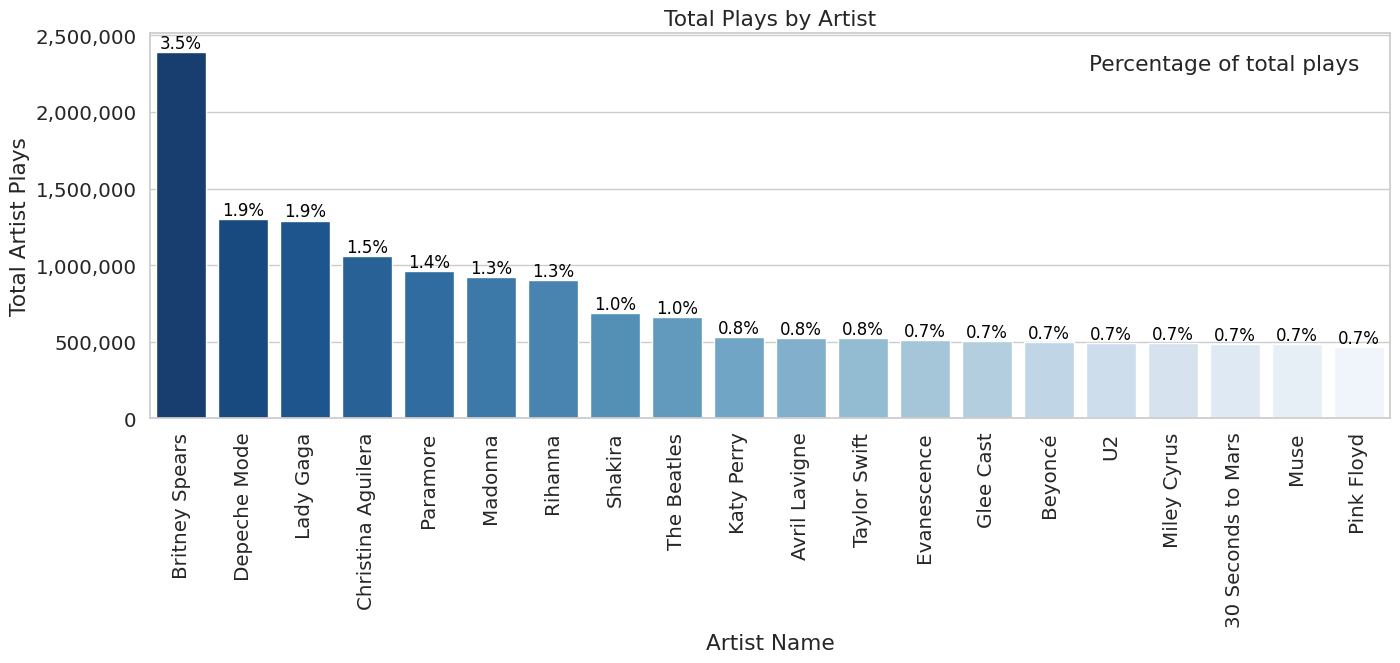

In [ ]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

<ipython-input-57-8ff54212cddf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x[:20], y=y[:20], palette='Blues_r');


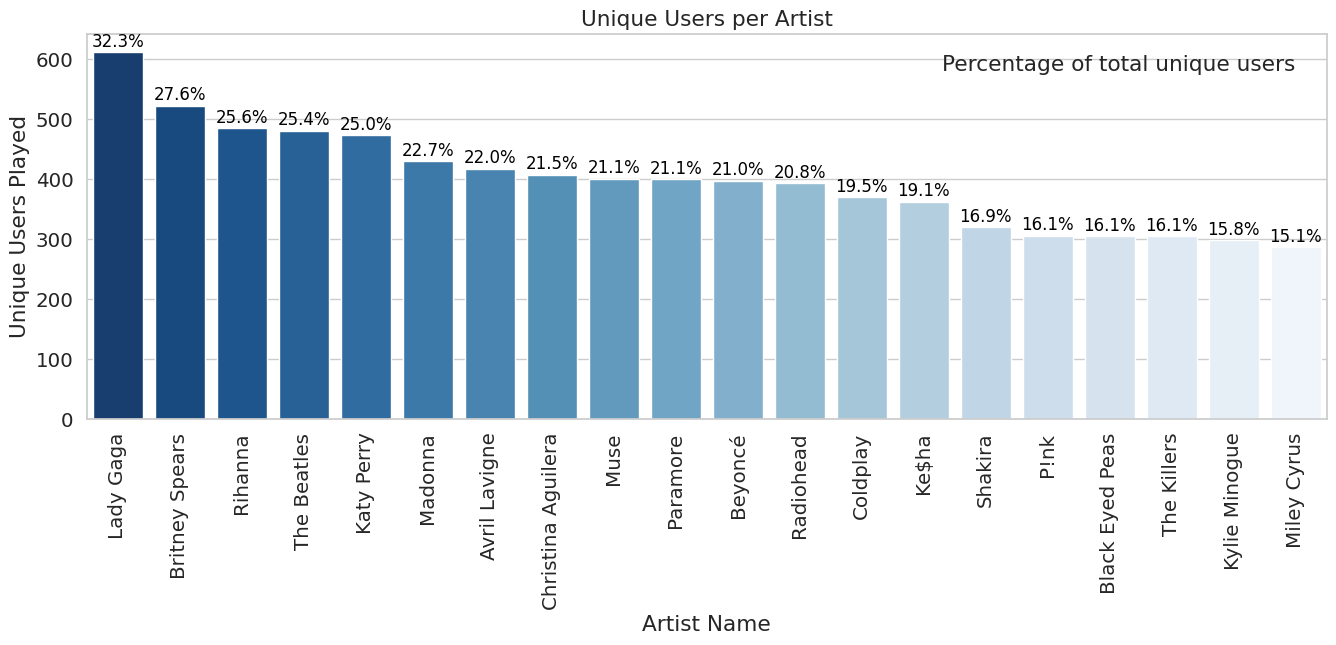

In [ ]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

<ipython-input-64-c3865954ba51>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(t,(x[i],y[i]))


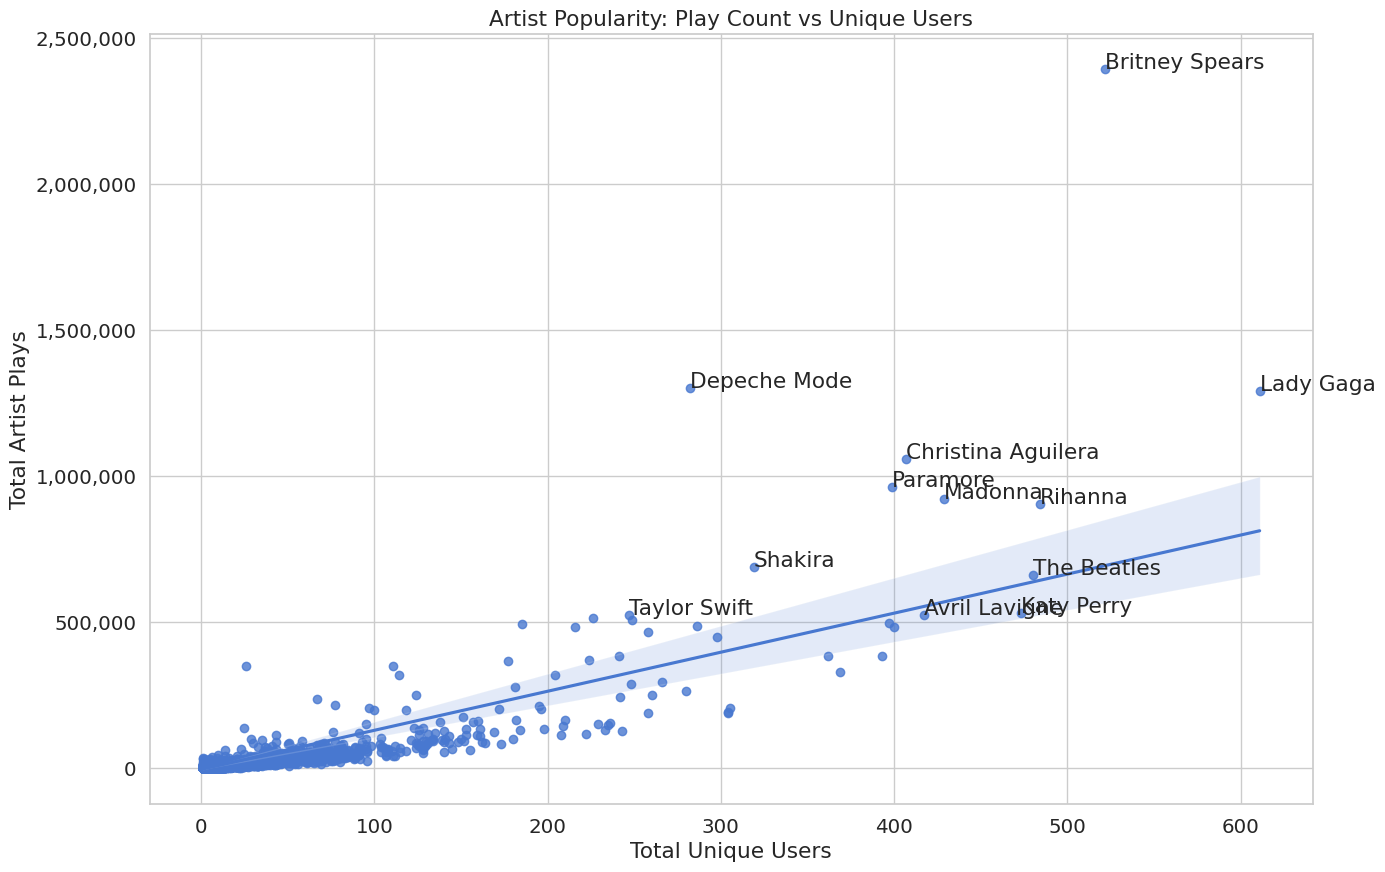

In [ ]:
# TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"
top_artists =  artist_rank.sort_values(['totalArtistPlays'],ascending=False)[:12].index
x = artist_rank.totalUniqueUsers  # TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank.totalArtistPlays # TODO :  "totalArtistPlays" of "artist_rank"
labels =  artist_rank.index# TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x=x,y=y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

In [ ]:
pc = ap.playCount
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [ ]:
ap

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
2800,Depeche Mode,1642,72,352698,282,1301308,4614.567376,1.000000
35843,Thalía,2071,792,324663,26,350035,13462.884615,0.920513
27302,U2,1094,511,320725,185,493024,2664.994595,0.909347
8152,Blur,1905,203,257978,114,318221,2791.412281,0.731441
26670,Paramore,1664,498,227829,399,963449,2414.659148,0.645960
...,...,...,...,...,...,...,...,...
38688,Destiny's Child,1810,913,1,83,34746,418.626506,0.000000
32955,Sia,1290,697,1,56,27597,492.803571,0.000000
71811,Chris Spheeris,510,4988,1,5,3106,621.200000,0.000000
91319,Haylie Duff,1851,17080,1,1,1,1.000000,0.000000


In [ ]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

ratings_df = ap.pivot(index="userID", columns="artistID", values="playCountScaled")


In [ ]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################

ratings_df = ratings_df.fillna(0)
ratings = ratings_df.to_numpy()

In [ ]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
sparsity_percentage = 100 * (1 - (ratings > 0).sum() / ratings.size)

# Print the sparsity percentage
print(f"Sparsity of the data: {sparsity_percentage:.2f}%")


## END

Sparsity of the data: 99.72%


<font color=3C99D size=5>
Question Three: Eigenvalues and Eigenvectors

## Libraries

In [ ]:
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import timeit

## Eigenvalues and Eigenvectors
Eigenvalues and eigenvectors are fundamental concepts in linear algebra. For a given square matrix A, if there is a non-zero vector v such that Av = λv, then λ is called the eigenvalue and v is the corresponding eigenvector.

## Functions for Eigenvalues and Eigenvectors
We will define functions to compute eigenvalues and eigenvectors.

In [ ]:
def compute_eigenvalues(A):
    """
    Computes and returns a list of eigenvalues of the input matrix A.

    Args:
    A (numpy.ndarray): The input matrix for which eigenvalues are computed.

    Returns:
    eigenvalues (list): A list containing the eigenvalues of matrix A.
    """
    eigenvalues, _ = np.linalg.eig(A)
    return eigenvalues.tolist()

def compute_eigenvector(A, eigenvalue):
    """
    Computes the eigenvector corresponding to the given eigenvalue of matrix A.

    Args:
    - A (numpy.ndarray): The square matrix.
    - eigenvalue (float or complex): The eigenvalue for which the eigenvector is computed.

    Returns:
    - eigenvector (numpy.ndarray): The eigenvector corresponding to the input eigenvalue.
    """
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)
    # Find the index of the given eigenvalue
    index = np.where(np.isclose(eigenvalues, eigenvalue))[0]
    if len(index) == 0:
        raise ValueError("The given eigenvalue is not an eigenvalue of the matrix A.")
    # Return the corresponding eigenvector (normalized)
    eigenvector = eigenvectors[:, index[0]]
    return eigenvector

def compute_eigenvectors(A):
    """
    Computes the eigenvectors of the matrix A.

    Args:
    - A (numpy.ndarray): The square matrix for which eigenvectors are computed.

    Returns:
    - eigenvectors (list of numpy.ndarray): A list containing the eigenvectors of matrix A.
    """
    eigenvalues, eigenvectors = np.linalg.eig(A)
    return eigenvectors

## Visualization of Vectors
A function to visualize vectors in 2D.

In [ ]:
def plot_vectors(vectors, colors, labels, title):
    plt.figure()
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.grid()
    for vector, color, label in zip(vectors, colors, labels):
        plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.title(title)
    plt.show()


## Example with a Random Matrix
We will generate a random 2D matrix with two independent eigenvectors and visualize them along with a random vector. Then we apply the transformation and plot them again.
### no need to change the below cells

In [ ]:
def generate_valid_matrix():
    while True:
        A = np.random.rand(2, 2)
        eigenvalues = np.linalg.eigvals(A)
        if (np.all(np.isreal(eigenvalues)) and
            len(set(eigenvalues)) == 2 and
            np.all(np.abs(eigenvalues) > 0.33) and
            np.all(np.abs(eigenvalues) < 3)):
            return A

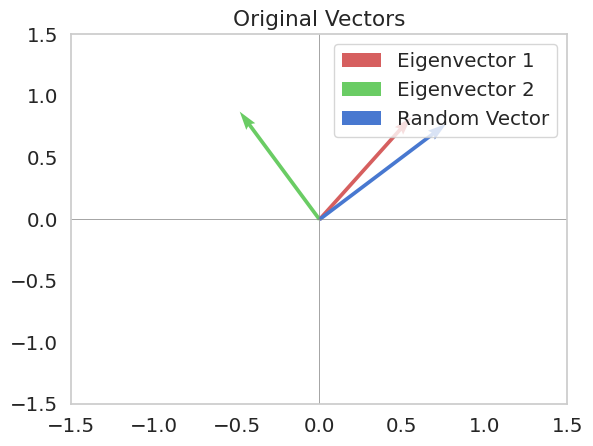

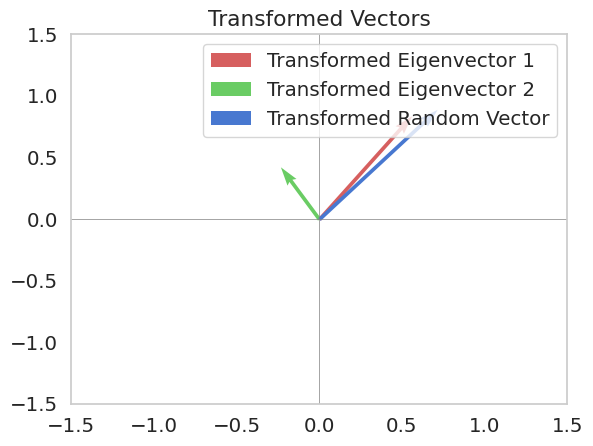

In [ ]:
A = generate_valid_matrix()
eigenvectors = compute_eigenvectors(A)

random_vector = np.random.rand(2)

plot_vectors([eigenvectors[:, 0], eigenvectors[:, 1], random_vector],
             ['r', 'g', 'b'],
             ['Eigenvector 1', 'Eigenvector 2', 'Random Vector'],
             'Original Vectors')

transformed_vectors = [A @ eigenvectors[:, 0], A @ eigenvectors[:, 1], A @ random_vector]

plot_vectors(transformed_vectors,
             ['r', 'g', 'b'],
             ['Transformed Eigenvector 1', 'Transformed Eigenvector 2', 'Transformed Random Vector'],
             'Transformed Vectors')

<h3 style='color: red;'>Question</h3>
explain this behavior of these vectors in 2D plain

<h3 style='color: yellow;'>Your answer</h3>

Because these 2 vectors are eigenvectors of matrix A, multipling A to them doesn't cahange their orientation.

## Diagonalization
Diagonalization of a matrix involves finding a matrix P and a diagonal matrix D such that A = PDP^(-1). This is possible if A has n linearly independent eigenvectors.

In [ ]:
def diagonalize(A):
    """
    Diagonalizes the square matrix A if possible using eigenvectors.

    Args:
    - A (numpy.ndarray): The square matrix to be diagonalized.

    Returns:
    - diagonal_matrix (numpy.ndarray): The diagonal matrix D such that A = PDP^-1,
      where D is diagonal and P is the matrix of eigenvectors.

    Attempts to diagonalize the input square matrix A using eigenvectors.
    Returns the diagonal matrix D. You are allowed to use numpy.linalg.inv(P) to compute P^-1.
    """

    # Compute the eigenvalues and eigenvectors
    eigenvalues = compute_eigenvalues(A)
    eigenvectors = compute_eigenvectors(A)


    D = np.diag(eigenvalues)
    P = eigenvectors
    P_inv = np.linalg.inv(P)

    return D, P, P_inv


to check your answer use the cells below

In [ ]:
def check_diagonalization(D, A):
    is_diagonal = np.allclose(D, np.diag(np.diagonal(D)))
    eigenvalues_A = np.linalg.eigvals(A)
    diagonal_entries_D = np.diagonal(D)
    has_correct_diagonal = np.allclose(np.sort(eigenvalues_A), np.sort(diagonal_entries_D))
    has_all_eigenvalues = set(diagonal_entries_D) >= set(eigenvalues_A)

    if is_diagonal and has_correct_diagonal and has_all_eigenvalues:
        display(HTML('<font color="green">All conditions satisfied:</font> Matrix D properly diagonalizes matrix A.'))
    else:
        if not is_diagonal:
            display(HTML('<font color="red">Error:</font> Matrix D is not diagonal.'))
        if not has_correct_diagonal:
            display(HTML('<font color="red">Error:</font> Diagonal entries of D are not eigenvalues of A.'))
        if not has_all_eigenvalues:
            display(HTML('<font color="red">Error:</font> D does not include all eigenvalues of A.'))


In [ ]:
A = generate_valid_matrix()

D,_,_ = diagonalize(A)

check_diagonalization(D, A)

## Properties of Diagonalized Matrix
A diagonalized matrix has its eigenvalues on the diagonal. It is easier to compute powers of a diagonal matrix.


<h3 style='color: red;'>Question</h3>
How do you think we can speed up the process of calculating powers of a matrix by using diagonalization?

<h3 style='color: yellow;'>Your answer:</h3>

Because when we digonalize a matrix, computing the power is only a matter of computing the power of D. and because D is digonalized, Its power computation is only a matter of computing the power of each of its components.

## Performance Comparison
We will compare the time taken to compute matrix powers using regular methods versus diagonalization.

First, we will compute the powers of a matrix using the regular method.

In [ ]:
def compute_powers(A, n):
    result = A
    for _ in range(n-1):
        result = result @ A
    return result

In [ ]:
n_values = range(1, 200)

In [ ]:
regular_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers(A, n))
    regular_times.append(timer.timeit(number=1))

Next, we will use your method for calculating power of a matrix.

In [ ]:
def compute_powers_your_way(A, n):
    """
    Computes the power of a square matrix A to the nth degree.

    Args:
    - A (numpy.ndarray): The square matrix for which powers are computed.
    - n (int): The exponent to which A is raised.

    Returns:
    - result (numpy.ndarray): The matrix A raised to the power of n.

    """
    D, P , P_inv = diagonalize(A)
    result = P @ D**n @ P_inv
    return result

In [ ]:
diagonal_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers_your_way(A, n))
    diagonal_times.append(timer.timeit(number=1))

Finally, we will plot the results to compare the performance of both methods.

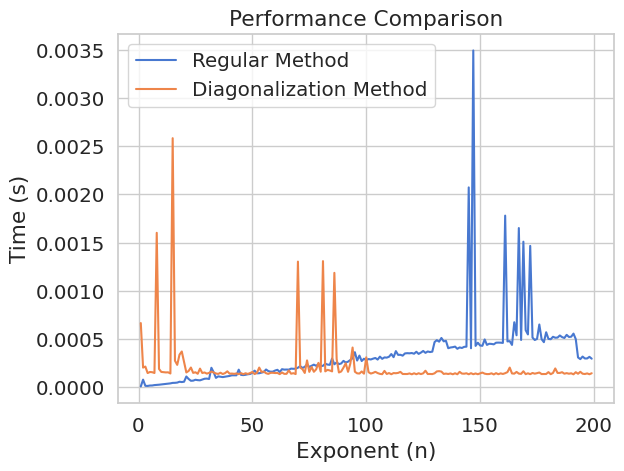

In [ ]:
plt.plot(n_values, regular_times, label='Regular Method')
plt.plot(n_values, diagonal_times, label='Diagonalization Method')
plt.xlabel('Exponent (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Performance Comparison')
plt.show()

<font color=3C99D size=5>
Question Four: KNN


A supervised machine learning approach called k-Nearest Neighbors (KNN) can be applied
to classification or regression problems. The approach does not make any assumptions about the underlying distributions of the data since KNN is non-parametric. As opposed to a parametric methodology like linear regression, which calls for us to identify a function that captures the connection between the dependent and independent variables, our method does not need th is. KNN has the benefit of being simple to comprehend. A query point (or test point) is categorized using the k labeled training points that are closest to it when utilized for classification.

This Iris dataset includes three iris species with 50 samples each as well as some properties
about each flower. One flower species is linearly separable from the other two, but the other
two are not linearly separable from each other.

load the Iris dataset from scikit-learn and convert it into a pandas DataFrame, including the target variable, and display the first few rows.

In [ ]:
#code here
df = pd.read_csv('IRIS.csv')
df = df.rename(columns={"species": "target"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Is the the dataset balanced or not?

Answer:

<Axes: ylabel='target'>

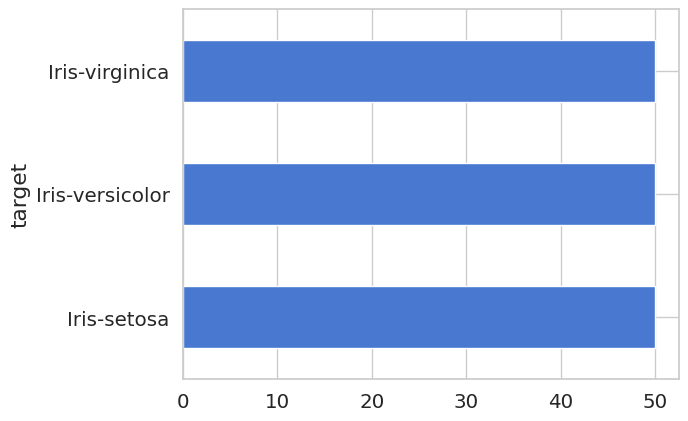

In [ ]:
df.groupby('target').size().plot(kind='barh')

Now we need a distance function. In KNN we find the distance between the test data with
all our dataset. We can use eucledean or manhattan distance. Here a generalized function is
used, with using a parameter p, when p = 1, it’s manhattan distance and when p = 2, it’s
eulclidean distance.


Write function that calculates the p-norm distance between two lists, a and b, with a default value of p=1:

In [ ]:
def dis(a, b, p=1):
    if len(a) != len(b):
        raise ValueError("Lists must be of the same length.")

    # Calculate p-norm distance
    d = sum(abs(x - y) ** p for x, y in zip(a, b)) ** (1 / p)
    return d

Now one test point will be executed before splitting data for train and test, it’s to check all
implementation, that have been so far. Here the test point that used is test_pt = [4.8, 2.7, 2.5,
0.7]. Here after taking the test point the code should measure distance from this data point with
all those 150 data points. Then it’ll convert that list to a python DataFrame for further
convenience

In [ ]:
test_pt = [4.8, 2.7, 2.5, 0.7]
# code here
dists = [dis(test_pt, data_point, 1) for data_point in df.iloc[:, :4].values]
# Convert distances to a DataFrame
dists = pd.DataFrame(dists, columns=['dist'])

dists.head()

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


Distance DataFrame is sorted to measure which class the nearest

In [ ]:
def knn_sort(k,dists):
    return dists.sort_values(by = 'dist')[:k]

Here k is 5. And taking top k distance the majority of
the class will be measure.

Find the most common class label among the k nearest neighbors after sorting their distances and counting occurrences.


In [ ]:
# code here
print(knn_sort(5, dists) )

selected_rows = df.loc[knn_sort(5, dists).index]

label_counts = selected_rows['target'].value_counts()

count_set = label_counts.to_dict()

print(max(count_set))

    dist
98   1.4
57   1.5
93   1.7
24   1.8
45   1.8
Iris-versicolor


Now determine the accurate prediction for that data point and now all the data
can be splitted for training and testing.
- 75% train, 25% test

In [ ]:
# code here
from sklearn.model_selection import train_test_split

x = df[['petal_length','petal_width','sepal_length','sepal_width']]
y = df['target']

X_train,X_test,y_train ,y_test = train_test_split(x.values,y, test_size = 0.25 ,random_state=32)

Implements the K-Nearest Neighbors (KNN) algorithm using a custom distance function, with missing parts that need to be filled in

In [ ]:
def KNN(X_train, X_test, y_train, y_test, k, p):
    y_predict = []
    for test_pt in X_test:
        distances = []
        for i in X_train:
            a = dis(i,test_pt , p)  # Missing: Calculate the distance between test_pt and i
            distances.append(a)
        dists = pd.DataFrame(data=distances, index=y_train.index, columns=['dist'])
        sorted_dists = dists.sort_values(by = 'dist')[:k]  # Missing: Sort the distances and select the k nearest

        count_set = {}
        for i in sorted_dists.index:
            if y_train[i] not in count_set:
                count_set[y_train[i]] = 1
            else:
                count_set[y_train[i]] += 1

        y_predict.append(max(count_set))  # Missing: Determine the most common class among the nearest neighbors

    accr = sum(yt == yp for yt, yp in zip(y_test, y_predict)) / len(y_test)  # Missing: Calculate the accuracy of predictions
    return accr


In [ ]:
KNN(X_train, X_test, y_train, y_test, 5,1)

1.0

See how the model accuracy varies with respect to k value. A
simple loop should be used to call KNN few times:

1.0


Text(0, 0.5, 'Accuracy (%)')

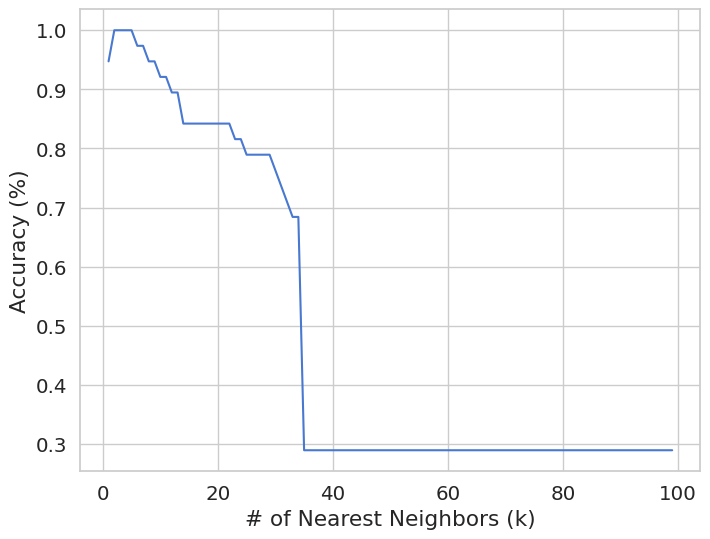

In [ ]:
accuracies = []
for i in range(1,100):
    accuracies.append(KNN(X_train, X_test, y_train, y_test, i,1))

print(max(accuracies))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')

What is the best K value?

Answer: The best K is 5 as it gives the best accuracy

<font color=3C99D size=5>
Question Five: Estimators of variance

In this question, we examine two common estimators of variance. The first estimator is related to the Maximum Likelihood Estimation (MLE):

$$
\hat{\sigma}^2_{\text{MLE}} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

The next estimator includes Bessel's correction:

$$
\hat{\sigma}^2_{\text{Bessel}} = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

Generate samples from a Normal distribution \(\mathcal{N}(2, 2)\) with sample sizes ranging from 2 to 1000, and for each, calculate the bias of both estimators.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# TODO
mu = 2
sigma_true = math.sqrt(2)
true_variance = sigma_true ** 2
sample_sizes = range(2, 1001)
n_trials = 1000

# Arrays to store biases
bias_mle = []
bias_bessel = []

# Loop over each sample size
for n in sample_sizes:
    mle_estimates = []
    bessel_estimates = []

    # Perform multiple trials for each sample size
    for _ in range(n_trials):
        sample = np.random.normal(mu, sigma_true, n)

        # Calculate MLE variance estimator
        mle_variance = np.mean((sample - np.mean(sample))**2)
        mle_estimates.append(mle_variance)

        # Calculate Bessel-corrected variance estimator
        bessel_variance = np.sum((sample - np.mean(sample))**2) / (n - 1)
        bessel_estimates.append(bessel_variance)

    # Calculate the bias for each estimator
    bias_mle.append(np.mean(mle_estimates) - true_variance)
    bias_bessel.append(np.mean(bessel_estimates) - true_variance)


Now, plot the bias values for each of the estimators.

Based on these plots, determine whether the two estimators are consistent.

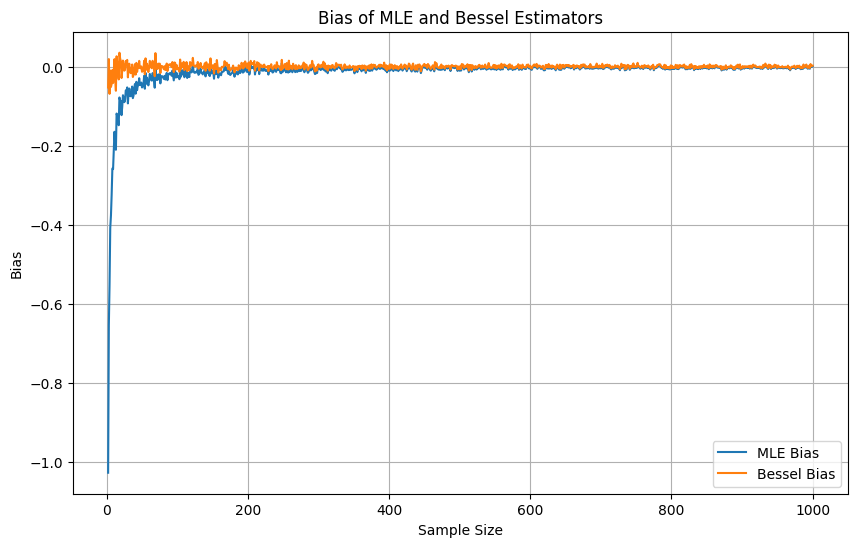

In [ ]:
# TODO
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, bias_mle, label='MLE Bias')
plt.plot(sample_sizes, bias_bessel, label='Bessel Bias')
plt.xlabel('Sample Size')
plt.ylabel('Bias')
plt.title('Bias of MLE and Bessel Estimators')
plt.legend()
plt.grid(True)
plt.show()

**Answer**: For reasonably big sample sizes, the bias for each estimator is nearly zero. But because for small sample sizes the MLE Bias is not zero, we can't say it's cnsistent.

This time, generate 100,000 samples, each of size 10, from the same Normal distribution $\mathcal{N}(2, 2)$, and calculate the mean bias for each estimator.


In [ ]:
#code here

# Loop over each sample size
mle_estimates = []
bessel_estimates = []

# Perform multiple trials for each sample size
for _ in range(100000):
    # Generate a random sample
    sample = np.random.normal(mu, sigma_true, 10)

    # Calculate MLE variance estimator
    mle_variance = np.mean((sample - np.mean(sample))**2)
    mle_estimates.append(mle_variance)

     # Calculate Bessel-corrected variance estimator
    bessel_variance = np.sum((sample - np.mean(sample))**2) / (10 - 1)
    bessel_estimates.append(bessel_variance)


    # Calculate the bias for each estimator
bias_mle = np.mean(mle_estimates) - true_variance
bias_bessel = np.mean(bessel_estimates) - true_variance

print(f'Mean Bias of MLE Estimator: {bias_mle}')
print(f'Mean Bias of Bessel Estimator: {bias_bessel}')

Mean Bias of MLE Estimator: -0.20401163582429604
Mean Bias of Bessel Estimator: -0.004457373138106346


Based on these values, determine whether the two estimators are unbiased. explain

**Answer:**
The MLE estimator has a non-zero bias as it's obvious, so it's not unbiased.
But The Bessel estimator has a nearly zero bias, so it is unbiased.


<font color=3C99D size=5>
Question Six*: Latent Semantic Analysis (LSA) with Singular Value Decomposition (SVD)





## Introduction

Latent Semantic Analysis (LSA) is a powerful technique in natural language processing and information retrieval that helps to uncover the underlying structure in a collection of texts. By using Singular Value Decomposition (SVD), LSA transforms high-dimensional textual data into a lower-dimensional space, capturing the most important patterns in the data.

### Objectives

In this homework, we will explore how LSA can be used to obtain vectors for words and documents, which can then be used for various tasks such as information retrieval, clustering, and semantic analysis. We will achieve this through the following steps:

1. **Preparing the Data**: We will start by gathering and preprocessing the text data to construct a term-document matrix.
2. **Singular Value Decomposition (SVD)**: We will apply SVD to the term-document matrix to obtain the latent semantic structure.
3. **Visualization**: Finally, we will visualize the word and document vectors to understand the relationships between them.

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from scipy.linalg import svd
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Data Preparation

In this section, we will prepare our dataset for Latent Semantic Analysis (LSA). This involves loading the dataset, preprocessing the texts, and creating the term-document matrix.

### 1. Loading the Dataset

First, we will load a dataset of news articles along with their labels indicating whether they are relieble or not. This dataset will serve as the foundation for our analysis.

### 2. Preprocessing the Texts

To prepare the texts for analysis, we need to perform several preprocessing steps:

- **Tokenization**: Breaking down the text into individual words or tokens.
- **Removing Stopwords**: Filtering out common words that do not carry significant meaning (e.g., "and", "the", "is").
- **Lemmatization**: Reducing words to their base or root form (e.g., "running" to "run").

These steps will help us create a clean and meaningful representation of the text data.

### 3. Creating the Term-Document Matrix

Once the texts are preprocessed, we will construct a term-document matrix. This matrix will have terms (words) as rows and documents (texts) as columns. Each entry in the matrix will represent the frequency of a term in a document. This matrix will be the input for applying Singular Value Decomposition (SVD) in the next section.


### Loading the Dataset

In [ ]:
# TODO: Load the dataset
news = pd.read_csv('fake_news.csv')
# TODO: Show the first 5 rows of the dataset
news.head()

,text,label
0,“For I delivered to you as of first importance...,0
1,WASHINGTON — President Trump sharply change...,0
2,Lightning struck twice at Baylor University’s ...,0
3,He did not mock. He did not scold. He did not ...,0
4,"Three years ago, girls from the Hockey in Newa...",0


### Preprocessing the Texts

In [ ]:
def preprocess_text(text):
    """
    Preprocess the input text by performing tokenization, stop words removal, and lemmatization.

    Args:
        text (str): The input text to be preprocessed.

    Returns:
        str: The preprocessed text.
    """
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = text.split()
    # Remove stop words and lemmatize the tokens
    stop_words = stopwords.words('english')
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


# TODO: Apply the preprocess_text function to the 'text' column of the DataFrame
news['text'] = news['text'].apply(preprocess_text)

# TODO: Show the first 5 rows of the dataset
news.head()

,text,label
0,delivered first importance also received chris...,0
1,washington president trump sharply changed fed...,0
2,lightning struck twice baylor university renow...,0
3,mock scold blunder instead donald j trump show...,0
4,three year ago girl hockey newark youth progra...,0


### Creating the Term-Document Matrix

In [ ]:
# TODO: Create the term-document matrix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
term_document_matrix = vectorizer.fit_transform(news['text'])

# TODO: Convert the term-document matrix to a DataFrame
term_document_matrix = pd.DataFrame(term_document_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# TODO: Show the first 5 rows of the term-document matrix
term_document_matrix.head()

,aa,aaa,aaaand,aab,aada,aade,aadi,aadidura,aadmi,aadvantage,...,zwo,zwolennicy,zwolennikami,zwrocie,zwrotu,zwycistwo,zyaratgah,zygar,zylinderkopfdichtung,zytsov
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Applying Singular Value Decomposition (SVD)

In this section, we will apply Singular Value Decomposition (SVD) to the term-document matrix to extract the latent semantic structure of the data. The right singular vectors obtained from SVD will be used as the embeddings for our documents.

### Singular Value Decomposition (SVD)

Singular Value Decomposition is a matrix factorization technique that decomposes a matrix $A$ into three matrices:

$$
A = U \Sigma V^T
$$

where:
- $U$ is an orthogonal matrix containing the left singular vectors.
- $\Sigma$ is a diagonal matrix containing the singular values.
- $V^T$ is the transpose of an orthogonal matrix containing the right singular vectors.

In the context of text data, the term-document matrix $A$ can be decomposed using SVD to reveal the underlying semantic structure.

### Extracting Document Embeddings

The right singular vectors obtained from the SVD are particularly useful for our analysis. These vectors, which are the columns of the matrix $V$, represent the documents in a reduced-dimensional semantic space. These document embeddings capture the essential features of the texts and can be used for various downstream tasks such as clustering, classification, and visualization.

By applying SVD to the term-document matrix, we will obtain a set of document embeddings that can be visualized and analyzed to gain insights into the relationships between different documents.


In [ ]:
# TODO: Perform Singular Value Decomposition (SVD) on the term-document matrix (this might take a few minutes)
from sklearn.decomposition import TruncatedSVD

n_components = 2
svd = TruncatedSVD(n_components=n_components)
doc_embeddings = svd.fit_transform(term_document_matrix)

# Create a DataFrame to hold the document embeddings
doc_embeddings_df = pd.DataFrame(doc_embeddings)

print(doc_embeddings_df.head())

           0          1
0  13.550644  -0.745599
1  35.021922  28.737062
2   1.751192   0.104214
3  23.404993  28.136452
4  16.273823  -1.585051


## Visualization

In this section, we will visualize the document embeddings obtained from Singular Value Decomposition (SVD). By plotting the first two singular vectors, we can create a 2D scatter plot of the documents. Each document will be colored based on its respective label (reliable or unreliable) to help us visually analyze the separation between different classes.

### 2D Embeddings

To visualize the document embeddings, we will use the first two right singular vectors obtained from SVD. These vectors correspond to the two largest singular values and capture the most significant features of the data.

### Scatter Plot

We will create a scatter plot where:
- Each point represents a document.
- The x-coordinate of a point corresponds to its first singular vector value.
- The y-coordinate of a point corresponds to its second singular vector value.
- The color of each point indicates whether the document is labeled as fake news or true news.

This visualization will allow us to see how well the SVD has separated the different classes of documents in a 2D space. It can also provide insights into the structure and distribution of the documents based on their latent semantic features.


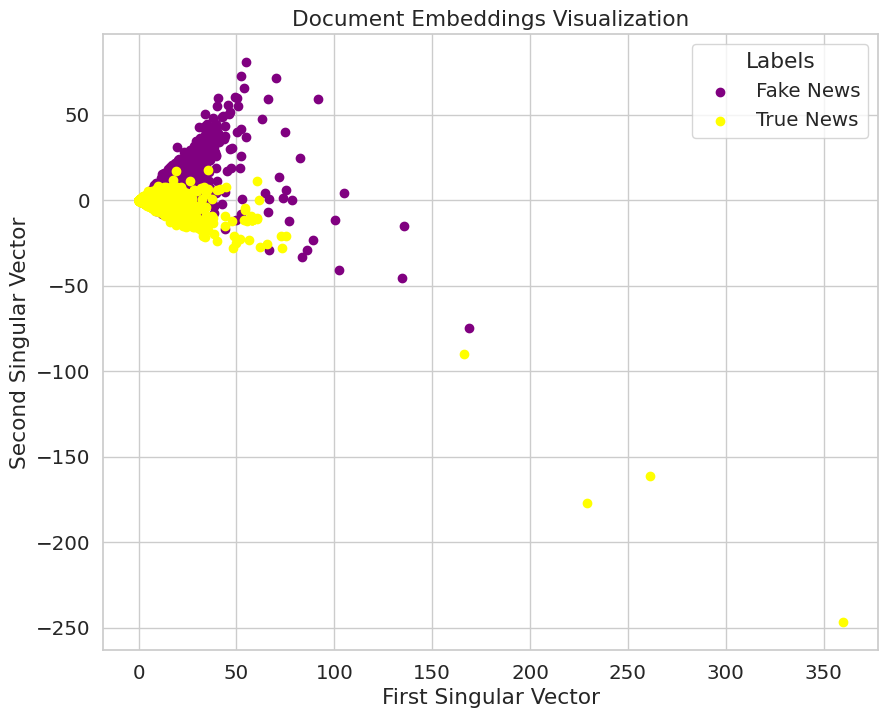

In [ ]:
# TODO: Plot the terms in the 2D space
# Define colors for labels
colors = {0: 'purple', 1: 'yellow'}
labels = {0: 'Fake News', 1: 'True News'}

# Create scatter plot with specific colors for each label
plt.figure(figsize=(10, 8))
for label in colors:
    subset = doc_embeddings_df[news['label'] == label]
    plt.scatter(subset[0], subset[1], c=colors[label], label=labels[label])

plt.xlabel('First Singular Vector')
plt.ylabel('Second Singular Vector')
plt.title('Document Embeddings Visualization')
plt.legend(title='Labels')
plt.show()

## Conclusion

In this homework, we explored the use of Latent Semantic Analysis (LSA) with Singular Value Decomposition (SVD) to obtain word and document vectors from a dataset of texts labeled as fake news or true news. We went through the steps of loading and preprocessing the data, applying SVD, and visualizing the document embeddings in a 2D space.

### Answer these questions:

1. **Why do you think reliable and unreliable news separated without using sample labels?**

The features corresponding to the distinction between fake and real news (basically certain words thst occur most in each category) are well preserved and extracted via the SVD decomposition. So the seperation using the extracted features is possible.
2. **What do the left singular vectors mean?**

The lest singular vector has a kigh correlation with the authenticity of the news. It can be considered a proxy indicator of the correctness of the news.


